In [33]:
# An implementation for the CHSH game and a classical and quantum algorithm to solve it

# Required imports

from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from numpy import pi
from numpy.random import randint

In [34]:
def chsh_game(strategy):
    """Plays the CHSH game
    Args:
        strategy (callable): A function that takes two bits (as `int`s) and
            returns two bits (also as `int`s). The strategy must follow the
            rules of the CHSH game.
    Returns:
        int: 1 for a win, 0 for a loss.
    """
    # Referee chooses x and y randomly
    x, y = randint(0, 2), randint(0, 2)

    # Use strategy to choose a and b
    a, b = strategy(x, y)

    # Referee decides if Alice and Bob win or lose
    if (a != b) == (x & y):
        return 1  # Win
    return 0  # Lose

In [35]:
def chsh_circuit(x, y):
    """Creates a `QuantumCircuit` that implements the best CHSH strategy.
    Args:
        x (int): Player_1's bit (must be 0 or 1)
        y (int): Player_2's bit (must be 0 or 1)
    Returns:
        QuantumCircuit: Circuit that, when run, returns Player_1 and Player_2's
            answer bits.
    """
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier()

    # Player_1
    if x == 0:
        qc.ry(0, 0)
    else:
        qc.ry(-pi / 2, 0)
    qc.measure(0, 0)

    # Player_2
    if y == 0:
        qc.ry(-pi / 4, 1)
    else:
        qc.ry(pi / 4, 1)
    qc.measure(1, 1)

    return qc

(x,y) = (0,0)


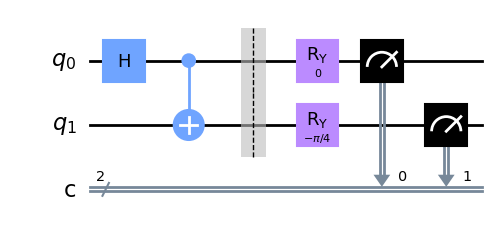

(x,y) = (0,1)


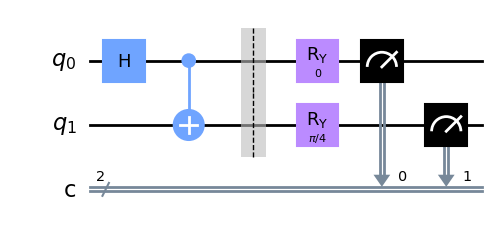

(x,y) = (1,0)


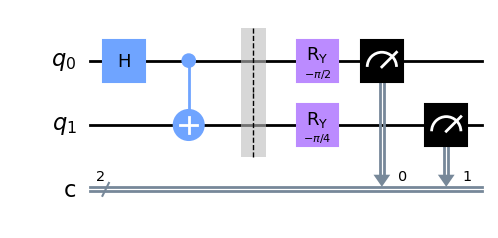

(x,y) = (1,1)


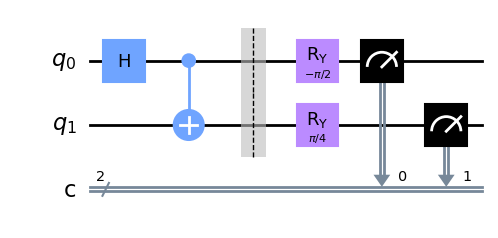

In [36]:
# Draw the four possible circuits

print("(x,y) = (0,0)")
display(chsh_circuit(0, 0).draw("mpl"))

print("(x,y) = (0,1)")
display(chsh_circuit(0, 1).draw("mpl"))

print("(x,y) = (1,0)")
display(chsh_circuit(1, 0).draw("mpl"))

print("(x,y) = (1,1)")
display(chsh_circuit(1, 1).draw("mpl"))

In [37]:
sampler = Sampler()


def quantum_strategy(x, y):
    """Carry out the best strategy for the CHSH game.
    Args:
        x (int): Player_1's bit (must be 0 or 1)
        y (int): Player_2's bit (must be 0 or 1)
    Returns:
        (int, int): Player_1 and Player_2's answer bits (respectively)
    """
    # `shots=1` runs the circuit once
    result = sampler.run(chsh_circuit(x, y), shots=1).result()
    statistics = result.quasi_dists[0].binary_probabilities()
    bits = list(statistics.keys())[0]
    a, b = bits[0], bits[1]
    return a, b

In [38]:
NUM_GAMES = 1000
TOTAL_SCORE = 0

for _ in range(NUM_GAMES):
    TOTAL_SCORE += chsh_game(quantum_strategy)

print("Fraction of games won:", TOTAL_SCORE / NUM_GAMES)

Fraction of games won: 0.847


In [39]:
def classical_strategy(x, y):
    """An optimal classical strategy for the CHSH game
    Args:
        x (int): Player_1's bit (must be 0 or 1)
        y (int): Player_2's bit (must be 0 or 1)
    Returns:
        (int, int): Player_1 and Player_2's answer bits (respectively)
    """
    # Player_1's answer
    if x == 0:
        a = 0
    elif x == 1:
        a = 1

    # Player_2's answer
    if y == 0:
        b = 1
    elif y == 1:
        b = 0

    return a, b

In [40]:
NUM_GAMES = 1000
TOTAL_SCORE = 0

for _ in range(NUM_GAMES):
    TOTAL_SCORE += chsh_game(classical_strategy)

print("Fraction of games won:", TOTAL_SCORE / NUM_GAMES)

Fraction of games won: 0.754
